In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
Insurance_path = "Health_insurance.csv"
County_results_path = "County_cases.csv"
# Read the data
Insurance_results = pd.read_csv(Insurance_path)
County_results = pd.read_csv(County_results_path)
Insurance_results.head()

,OBJECTID,GEO_ID,GEO_NAME,GEO_PARENT_NAME,FIPS_CODE,B27010_004E,B27010_004M,B27010_020E,B27010_020M,B27010_036E,...,DP03_0098E,DP03_0098M,DP03_0099E,DP03_0099M,DP03_0100E,DP03_0100M,DP03_0101E,DP03_0101M,DP03_0099PE,DP03_0099PM
0,1,0500000US01001,Autauga County,Alabama,1001,6247,723,6248,498,12131,...,18191,965,3875,508,14134,125,322,143,7.1,0.9
1,2,0500000US01003,Baldwin County,Alabama,1003,22820,1479,17847,982,45216,...,72322,1864,20864,1646,48048,391,1978,546,10.2,0.8
2,3,0500000US01005,Barbour County,Alabama,1005,1385,206,1598,264,3712,...,11508,467,2558,363,5706,82,174,102,11.2,1.6
3,4,0500000US01007,Bibb County,Alabama,1007,2509,471,2247,433,4680,...,7748,761,1619,396,4859,57,86,64,7.9,1.9
4,5,0500000US01009,Blount County,Alabama,1009,7016,569,6396,483,12444,...,19752,939,6303,732,14057,144,914,313,11.0,1.3


In [2]:
County_results.head()

,last_update,location_type,state,county_name,county_name_long,fips_code,lat,lon,NCHS_urbanization,total_population,confirmed,confirmed_per_100000,deaths,deaths_per_100000
0,2020-09-23 23:23:49 UTC,county,Alabama,Autauga,"Autauga, Alabama, US",1001.0,32.539527,-86.644082,Medium metro,55200.0,1715,3106.88,25,45.29
1,2020-09-23 23:23:49 UTC,county,Alabama,Baldwin,"Baldwin, Alabama, US",1003.0,30.727750,-87.722071,Small metro,208107.0,5141,2470.36,49,23.55
2,2020-09-23 23:23:49 UTC,county,Alabama,Barbour,"Barbour, Alabama, US",1005.0,31.868263,-85.387129,Non-core,25782.0,851,3300.75,7,27.15
3,2020-09-23 23:23:49 UTC,county,Alabama,Bibb,"Bibb, Alabama, US",1007.0,32.996421,-87.125115,Large fringe metro,22527.0,638,2832.16,10,44.39
4,2020-09-23 23:23:49 UTC,county,Alabama,Blount,"Blount, Alabama, US",1009.0,33.982109,-86.567906,Large fringe metro,57645.0,1580,2740.91,15,26.02


In [3]:
Insurance_results

,OBJECTID,GEO_ID,GEO_NAME,GEO_PARENT_NAME,FIPS_CODE,B27010_004E,B27010_004M,B27010_020E,B27010_020M,B27010_036E,...,DP03_0098E,DP03_0098M,DP03_0099E,DP03_0099M,DP03_0100E,DP03_0100M,DP03_0101E,DP03_0101M,DP03_0099PE,DP03_0099PM
0,1,0500000US01001,Autauga County,Alabama,1001,6247,723,6248,498,12131,...,18191,965,3875,508,14134,125,322,143,7.1,0.9
1,2,0500000US01003,Baldwin County,Alabama,1003,22820,1479,17847,982,45216,...,72322,1864,20864,1646,48048,391,1978,546,10.2,0.8
2,3,0500000US01005,Barbour County,Alabama,1005,1385,206,1598,264,3712,...,11508,467,2558,363,5706,82,174,102,11.2,1.6
3,4,0500000US01007,Bibb County,Alabama,1007,2509,471,2247,433,4680,...,7748,761,1619,396,4859,57,86,64,7.9,1.9
4,5,0500000US01009,Blount County,Alabama,1009,7016,569,6396,483,12444,...,19752,939,6303,732,14057,144,914,313,11.0,1.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3215,3216,0500000US72149,Villalba Municipio,Puerto Rico,72149,1143,291,1122,268,2696,...,15701,739,1098,317,5575,90,241,151,4.8,1.4
3216,3217,0500000US72151,Yabucoa Municipio,Puerto Rico,72151,1877,424,1833,354,3179,...,24065,1092,1693,366,7468,131,54,50,5.0,1.1
3217,3218,0500000US72153,Yauco Municipio,Puerto Rico,72153,1313,333,1387,326,3681,...,25239,973,1927,558,7662,100,446,268,5.3,1.5
3218,3219,0500000US15005,Kalawao County,Hawaii,15005,2,4,9,5,33,...,14,7,2,2,4,6,0,11,2.9,3.5


In [4]:
# Create a clean DataFrame by dropping all columns except 
Insurance_results[["GEO_NAME", "GEO_PARENT_NAME","DP03_0099PE","DP03_0099PM"]].head()

,GEO_NAME,GEO_PARENT_NAME,DP03_0099PE,DP03_0099PM
0,Autauga County,Alabama,7.1,0.9
1,Baldwin County,Alabama,10.2,0.8
2,Barbour County,Alabama,11.2,1.6
3,Bibb County,Alabama,7.9,1.9
4,Blount County,Alabama,11.0,1.3


In [5]:
clean_Insurance_results_df=Insurance_results[["GEO_NAME", "GEO_PARENT_NAME","DP03_0099PE","DP03_0099PM"]]
clean_Insurance_results_df.head()

,GEO_NAME,GEO_PARENT_NAME,DP03_0099PE,DP03_0099PM
0,Autauga County,Alabama,7.1,0.9
1,Baldwin County,Alabama,10.2,0.8
2,Barbour County,Alabama,11.2,1.6
3,Bibb County,Alabama,7.9,1.9
4,Blount County,Alabama,11.0,1.3


In [6]:
Insurance_df = clean_Insurance_results_df.rename(columns={"GEO_NAME":"GEO_NAME","GEO_PARENT_NAME":"GEO_PARENT_NAME",
                                                          "DP03_0099PE":"Percent of Population with No Health Insurance Coverage","DP03_0099PM":"Percent of Population with No Health Insurance Coverage *margin of error"})
Insurance_df.head()

,GEO_NAME,GEO_PARENT_NAME,Percent of Population with No Health Insurance Coverage,Percent of Population with No Health Insurance Coverage *margin of error
0,Autauga County,Alabama,7.1,0.9
1,Baldwin County,Alabama,10.2,0.8
2,Barbour County,Alabama,11.2,1.6
3,Bibb County,Alabama,7.9,1.9
4,Blount County,Alabama,11.0,1.3


In [7]:
Insurance_df

,GEO_NAME,GEO_PARENT_NAME,Percent of Population with No Health Insurance Coverage,Percent of Population with No Health Insurance Coverage *margin of error
0,Autauga County,Alabama,7.1,0.9
1,Baldwin County,Alabama,10.2,0.8
2,Barbour County,Alabama,11.2,1.6
3,Bibb County,Alabama,7.9,1.9
4,Blount County,Alabama,11.0,1.3
...,...,...,...,...
3215,Villalba Municipio,Puerto Rico,4.8,1.4
3216,Yabucoa Municipio,Puerto Rico,5.0,1.1
3217,Yauco Municipio,Puerto Rico,5.3,1.5
3218,Kalawao County,Hawaii,2.9,3.5


In [8]:
Insurance_df['county_name'] = Insurance_df['GEO_NAME'].str.split(' ', 1, expand=True)[0]
Insurance_df.head()

,GEO_NAME,GEO_PARENT_NAME,Percent of Population with No Health Insurance Coverage,Percent of Population with No Health Insurance Coverage *margin of error,county_name
0,Autauga County,Alabama,7.1,0.9,Autauga
1,Baldwin County,Alabama,10.2,0.8,Baldwin
2,Barbour County,Alabama,11.2,1.6,Barbour
3,Bibb County,Alabama,7.9,1.9,Bibb
4,Blount County,Alabama,11.0,1.3,Blount


In [9]:
Insurance_df["county_name_long"] = Insurance_df["county_name"] + ", " + Insurance_df["GEO_PARENT_NAME"] + ", US"
Insurance_df.head()

,GEO_NAME,GEO_PARENT_NAME,Percent of Population with No Health Insurance Coverage,Percent of Population with No Health Insurance Coverage *margin of error,county_name,county_name_long
0,Autauga County,Alabama,7.1,0.9,Autauga,"Autauga, Alabama, US"
1,Baldwin County,Alabama,10.2,0.8,Baldwin,"Baldwin, Alabama, US"
2,Barbour County,Alabama,11.2,1.6,Barbour,"Barbour, Alabama, US"
3,Bibb County,Alabama,7.9,1.9,Bibb,"Bibb, Alabama, US"
4,Blount County,Alabama,11.0,1.3,Blount,"Blount, Alabama, US"


In [10]:
# Combine the data into a single dataset
merged_data = pd.merge(County_results,Insurance_df,on="county_name_long")

# Display the data table for preview


merged_data.shape

(2971, 19)

In [11]:
# Display the data table for preview

merged_data.head()

,last_update,location_type,state,county_name_x,county_name_long,fips_code,lat,lon,NCHS_urbanization,total_population,confirmed,confirmed_per_100000,deaths,deaths_per_100000,GEO_NAME,GEO_PARENT_NAME,Percent of Population with No Health Insurance Coverage,Percent of Population with No Health Insurance Coverage *margin of error,county_name_y
0,2020-09-23 23:23:49 UTC,county,Alabama,Autauga,"Autauga, Alabama, US",1001.0,32.539527,-86.644082,Medium metro,55200.0,1715,3106.88,25,45.29,Autauga County,Alabama,7.1,0.9,Autauga
1,2020-09-23 23:23:49 UTC,county,Alabama,Baldwin,"Baldwin, Alabama, US",1003.0,30.727750,-87.722071,Small metro,208107.0,5141,2470.36,49,23.55,Baldwin County,Alabama,10.2,0.8,Baldwin
2,2020-09-23 23:23:49 UTC,county,Alabama,Barbour,"Barbour, Alabama, US",1005.0,31.868263,-85.387129,Non-core,25782.0,851,3300.75,7,27.15,Barbour County,Alabama,11.2,1.6,Barbour
3,2020-09-23 23:23:49 UTC,county,Alabama,Bibb,"Bibb, Alabama, US",1007.0,32.996421,-87.125115,Large fringe metro,22527.0,638,2832.16,10,44.39,Bibb County,Alabama,7.9,1.9,Bibb
4,2020-09-23 23:23:49 UTC,county,Alabama,Blount,"Blount, Alabama, US",1009.0,33.982109,-86.567906,Large fringe metro,57645.0,1580,2740.91,15,26.02,Blount County,Alabama,11.0,1.3,Blount


In [12]:
print(merged_data['county_name_x'].value_counts())
print(merged_data['county_name_y'].value_counts())


Washington    30
Jefferson     28
Franklin      26
Jackson       24
Lincoln       24
              ..
Rogers         1
Dickey         1
Magoffin       1
Real           1
Garrett        1
Name: county_name_x, Length: 1689, dtype: int64
Washington    30
Jefferson     28
Franklin      26
Jackson       24
Lincoln       24
              ..
Rogers         1
Dickey         1
Magoffin       1
Real           1
Garrett        1
Name: county_name_y, Length: 1689, dtype: int64


In [13]:
# Save clean merged data into a csv file
merged_data.to_csv("covidinsurance.csv", encoding='utf-8', index = False)

In [14]:
merged_data['county_name_long'].value_counts()

Franklin, Virginia, US           2
Fairfax, Virginia, US            2
Lake, Minnesota, US              2
Richmond, Virginia, US           2
Jefferson, Louisiana, US         2
                                ..
Edgefield, South Carolina, US    1
Otero, Colorado, US              1
Power, Idaho, US                 1
Archuleta, Colorado, US          1
Moore, North Carolina, US        1
Name: county_name_long, Length: 2961, dtype: int64

In [15]:
Group1_df=merged_data[["state", "deaths_per_100000","Percent of Population with No Health Insurance Coverage"]]
Group1_df.head()

,state,deaths_per_100000,Percent of Population with No Health Insurance Coverage
0,Alabama,45.29,7.1
1,Alabama,23.55,10.2
2,Alabama,27.15,11.2
3,Alabama,44.39,7.9
4,Alabama,26.02,11.0


In [16]:
Grouped = Group1_df.groupby(["state"]).count()["deaths_per_100000"]
Grouped

state
Alabama            66
Alaska             15
Arizona            13
Arkansas           71
California         44
Colorado           55
Connecticut         6
Delaware            2
Florida            62
Georgia           157
Hawaii              4
Idaho              41
Illinois           98
Indiana            91
Iowa               93
Kansas            105
Kentucky          120
Louisiana          46
Maine              16
Maryland           20
Massachusetts      12
Michigan           78
Minnesota          77
Mississippi        81
Missouri          107
Montana            48
Nebraska           89
Nevada             15
New Hampshire      10
New Jersey         20
New Mexico         26
New York           60
North Carolina     99
North Dakota       51
Ohio               87
Oklahoma           75
Oregon             35
Pennsylvania       67
Puerto Rico        50
Rhode Island        5
South Carolina     46
South Dakota       62
Tennessee          94
Texas             237
Utah                5
Verm

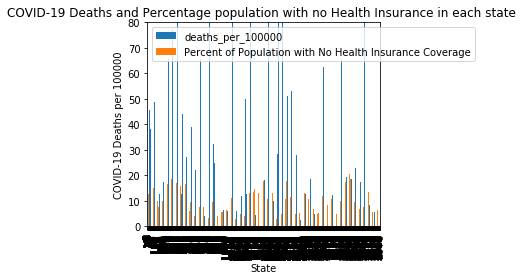

In [17]:
# Generate a bar plot showing the deaths_per_100000 for each state with the percentage Population with No Health Insurance Coverage using pandas. 
# Use DataFrame.plot() 
Group1_df.plot(kind="bar")
x_axis = np.arange(len("state"))
y_axis = np.arange(len(Grouped))
plt.ylim(0, max(y_axis)+30)
# Set a title for the chart
plt.title("COVID-19 Deaths and Percentage population with no Health Insurance in each state ")
plt.xlabel("State")
plt.ylabel("COVID-19 Deaths per 100000")
plt.tight_layout()
plt.show()

In [18]:
Alabama_df = Group1_df.loc[Group1_df["state"] == "Alabama",:]
Alabama_df

,state,deaths_per_100000,Percent of Population with No Health Insurance Coverage
0,Alabama,45.29,7.1
1,Alabama,23.55,10.2
2,Alabama,27.15,11.2
3,Alabama,44.39,7.9
4,Alabama,26.02,11.0
...,...,...,...
61,Alabama,56.25,7.5
62,Alabama,128.70,11.0
63,Alabama,78.11,9.6
64,Alabama,101.77,11.6


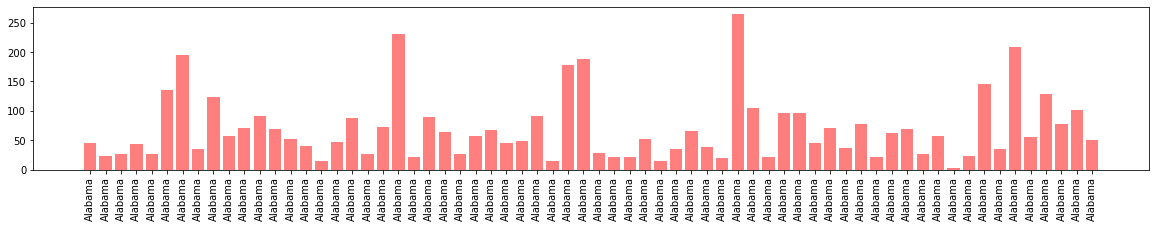

In [19]:
# Set x axis and tick locations
x_axis = np.arange(len(Alabama_df))
tick_locations = [value+0.4 for value in x_axis]
# Create a list indicating where to write x labels and set figure size to adjust for space
plt.figure(figsize=(20,3))
plt.bar(x_axis, Alabama_df["deaths_per_100000"], color='r',alpha=0.5,align="edge")
plt.xticks(tick_locations, Alabama_df["state"], rotation="vertical")
plt.show()

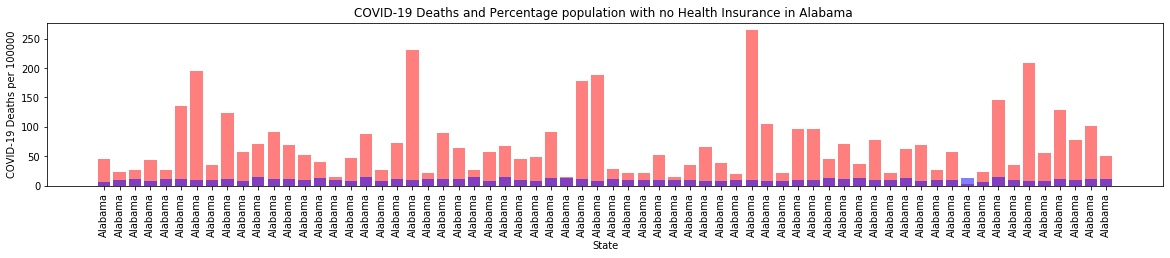

In [20]:
# Set x axis and tick locations
x_axis = np.arange(len(Alabama_df))
tick_locations = [value+0.4 for value in x_axis]
# Create a list indicating where to write x labels and set figure size to adjust for space
plt.figure(figsize=(20,3))
plt.bar(x_axis, Alabama_df["deaths_per_100000"], color='r',alpha=0.5, align="edge")
plt.bar(x_axis, Alabama_df["Percent of Population with No Health Insurance Coverage"],color='b',alpha=0.5, align="edge")
plt.xticks(tick_locations, Alabama_df["state"], rotation="vertical")
# Set a title for the chart
plt.title("COVID-19 Deaths and Percentage population with no Health Insurance in Alabama ")
plt.xlabel("State")
plt.ylabel("COVID-19 Deaths per 100000")
plt.show()

In [21]:
Group2_df=merged_data[["county_name_x","state", "deaths_per_100000","Percent of Population with No Health Insurance Coverage"]]
                       
Group2_df.head()

,county_name_x,state,deaths_per_100000,Percent of Population with No Health Insurance Coverage
0,Autauga,Alabama,45.29,7.1
1,Baldwin,Alabama,23.55,10.2
2,Barbour,Alabama,27.15,11.2
3,Bibb,Alabama,44.39,7.9
4,Blount,Alabama,26.02,11.0


In [31]:
County_Alabama_df = Group2_df.loc[Group2_df["state"] == "Alabama",:]
County_Alabama_df

,county_name_x,state,deaths_per_100000,Percent of Population with No Health Insurance Coverage
0,Autauga,Alabama,45.29,7.1
1,Baldwin,Alabama,23.55,10.2
2,Barbour,Alabama,27.15,11.2
3,Bibb,Alabama,44.39,7.9
4,Blount,Alabama,26.02,11.0
...,...,...,...,...
61,Tuscaloosa,Alabama,56.25,7.5
62,Walker,Alabama,128.70,11.0
63,Washington,Alabama,78.11,9.6
64,Wilcox,Alabama,101.77,11.6


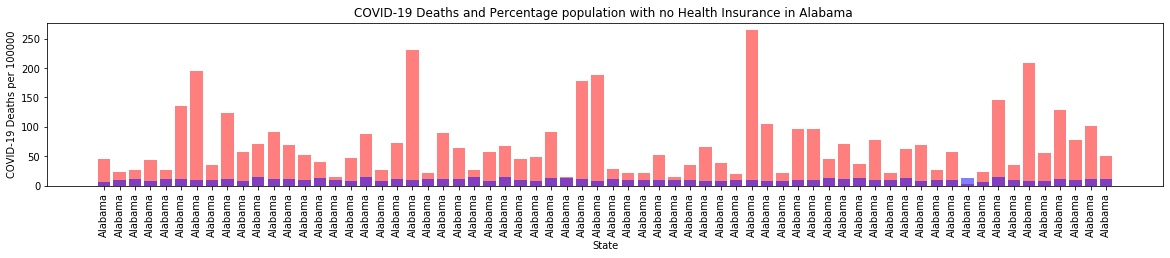

In [32]:
# Set x axis and tick locations
x_axis = np.arange(len(County_Alabama_df))
tick_locations = [value+0.4 for value in x_axis]
# Create a list indicating where to write x labels and set figure size to adjust for space
plt.figure(figsize=(20,3))
plt.bar(x_axis,County_Alabama_df["deaths_per_100000"], color='r',alpha=0.5, align="edge")
plt.bar(x_axis,County_Alabama_df["Percent of Population with No Health Insurance Coverage"],color='b',alpha=0.5, align="edge")
plt.xticks(tick_locations, County_Alabama_df["state"], rotation="vertical")
# Set a title for the chart
plt.title("COVID-19 Deaths and Percentage population with no Health Insurance in Alabama ")
plt.xlabel("State")
plt.ylabel("COVID-19 Deaths per 100000")
plt.show()